<a href="https://colab.research.google.com/github/juanosalvador/Optimal-Value-for-epsilon-DBSCAN/blob/main/Hiperparameter_Tunning_The_Optimal_Value_For_Epsilon_(EPS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#sklearn

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
## sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

sns.set()

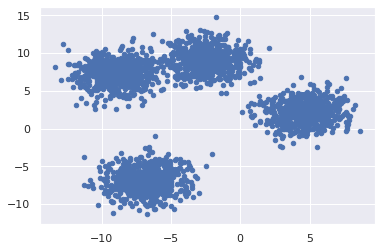

In [2]:
## Load synthetic date
# blobs with varied variances
n_samples = 2500
n_features = 2
n_clusters = 4
random_state = 42
#max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  cluster_std=1.5,
                  centers=n_clusters, 
                  random_state=random_state)
plt.scatter(X[:,0],X[:,1], s = 20)
plt.show()

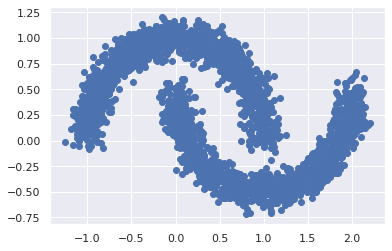

In [3]:
## make moon
Xm, ym = make_moons(2500, noise=0.09, random_state=0)
plt.scatter(Xm[:,0], Xm[:,1])
plt.show()

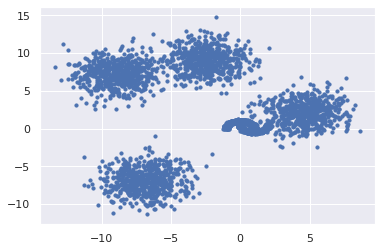

In [ ]:
## Concatenate numpy arrays
X = np.concatenate((X,Xm),axis = 0)
plt.scatter(X[:,0], X[:,1], s = 10)

In [ ]:
################## DBSCAN######################
# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X)


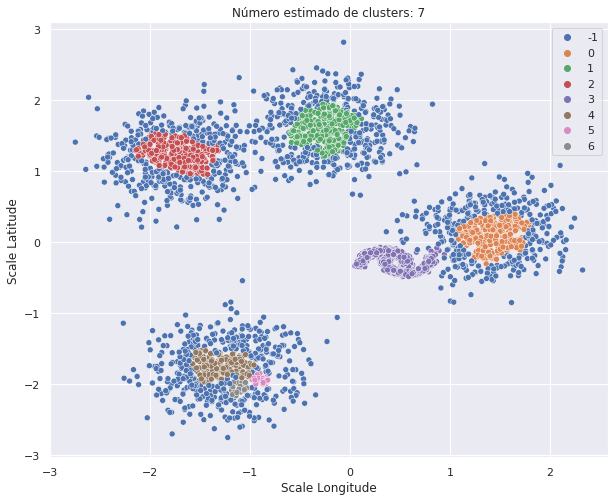

In [ ]:
"""Datos Escalados"""
# Entrada de datos
eps = 0.09
min_samples = 20
#
db = DBSCAN(eps= eps, min_samples=min_samples).fit(X_scaled)
labels = db.labels_

### Visualización
fig = plt.figure(figsize=(10, 8))
#sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=["cluster-{}".format(x) for x in labels])
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Número estimado de clusters: %d' % (len(np.unique(labels))-1))
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 1444
Silhouette Coefficient: 0.286


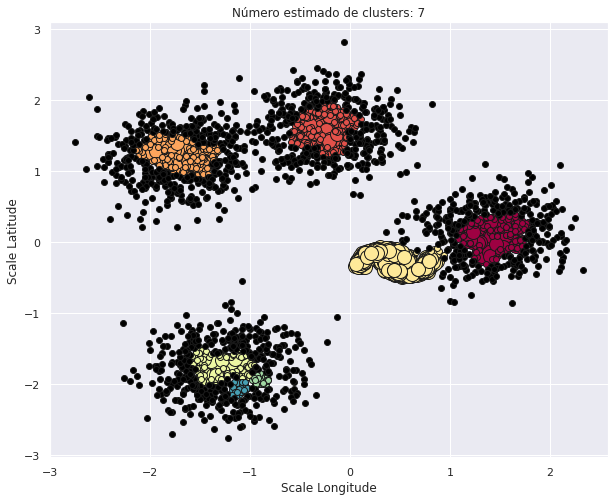

In [ ]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# Tunning epsilon
[paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)<br>
[explicación del método](https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
k = 20 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
#neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
#nbrs = neigh.fit(X_scaled)
#distances1, indices = nbrs.kneighbors(X_scaled)

Text(0.5, 0, 'Points')

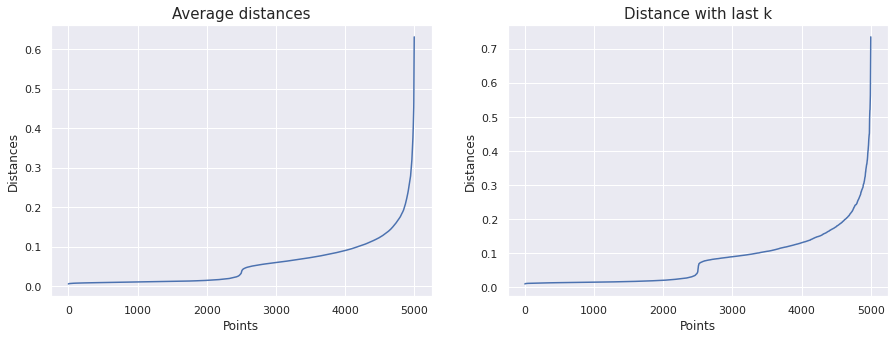

In [ ]:
neigh = NearestNeighbors(n_neighbors= k, metric='euclidean')
nbrs = neigh.fit(X_scaled)
## distancias, metodo de la meadia, obentenemos la media de la matriz de distancias, dejamos fuera el primer vecino ya que es el mismo punto
distances1, indices = nbrs.kneighbors(X_scaled)
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1:].mean(1)

### método del último vecino
distances_last , indices_last= nbrs.kneighbors(X_scaled)
distances_last = np.sort(distances_last, axis = 0)[:,k-1]

# Graficamos
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].plot(distances1)
axes[0].set_title('Average distances', fontsize=15)
axes[0].set_ylabel('Distances')
axes[0].set_xlabel('Points')
#axes[0].tick_params(axis='both', labelsize=12)

axes[1].plot(distances_last)
axes[1].set_title('Distance with last k', fontsize=15)
axes[1].set_ylabel('Distances')
axes[1].set_xlabel('Points')
#axes[1].tick_params(axis='both', labelsize=12)


# Encontrando el punto en el codo
[Libreria Kneed](https://pypi.org/project/kneed/)<br>
[Otras formas de calcular el codo](https://stackoverflow.com/questions/43160240/how-to-plot-a-k-distance-graph-in-python)<br>

[medium 1](https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62)
[medium2]()

In [ ]:
!pip install kneed

The value for the optimal epsilon is in:  4529
epsilon:  0.126
The value for the optimal epsilon is in:  4332
epsilon:  0.158


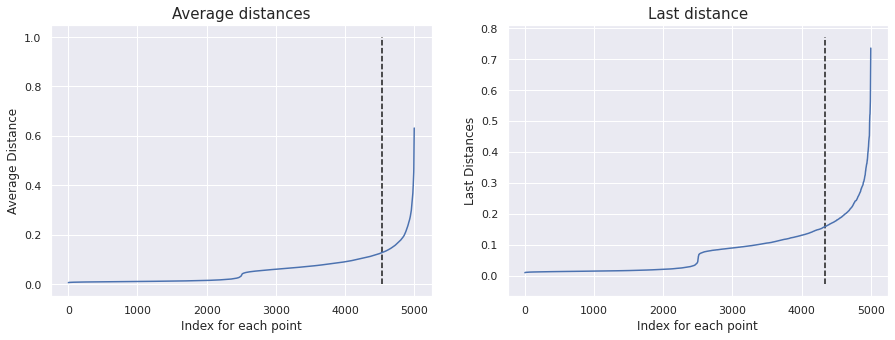

In [ ]:
from kneed import KneeLocator
"""Average distances"""
kn = KneeLocator(range(1, len(distances1)+1) ,distances1,  curve='convex', direction='increasing', S = 1,) # interp_method='polynomial'
print('The value for the optimal epsilon is in: ', kn.knee)
print('epsilon: ' ,  round(distances1[kn.knee],3))

""" Last kneighbors distances"""
kn2 = KneeLocator(range(1, len(distances_last)+1), distances_last, curve = 'convex', direction='increasing', S=1,interp_method='polynomial') # interp_method='polynomial'
print('The value for the optimal epsilon is in: ', kn2.knee)
print('epsilon: ' , round(distances_last[kn2.knee],3))

# Graficamos
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].plot(range(1, len(distances1)+1), distances1)
axes[0].set_title('Average distances', fontsize=15)
axes[0].set_ylabel('Average Distance')
axes[0].set_xlabel('Index for each point')
axes[0].vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
#axes[0].tick_params(axis='both', labelsize=12)

axes[1].plot(range(1, len(distances_last)+1),distances_last)
axes[1].set_title('Last distance', fontsize=15)
axes[1].set_ylabel('Last Distances')
axes[1].set_xlabel('Index for each point')
axes[1].vlines(kn2.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.show()


In [ ]:
distancia = kn.knee
epsilon = round(distances1[distancia],3)
epsilon 

0.126

In [ ]:
 #### DBSCAN Datos Escalados###
 ##DBSCAN
#k = 20 ## vecinos más cercanos
#epsilon = 0.09 ## anterior
db = DBSCAN(eps= epsilon, metric='euclidean', min_samples= k).fit(X_scaled)
labels = db.labels_

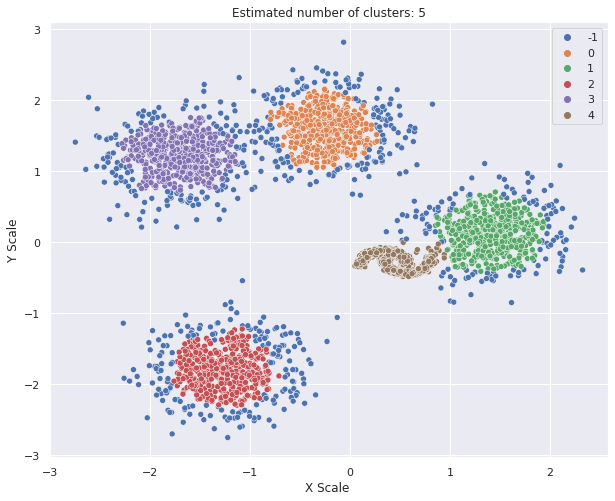

Estimated number of clusters: 5
Estimated number of noise points: 633
Silhouette Coefficient: 0.537


In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
plt.title('Estimated number of clusters: %d' % (len(np.unique(labels))-1) )
plt.xlabel('X Scale ')
plt.ylabel('Y Scale')
plt.show()
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_ )
print('Estimated number of noise points: %d' % n_noise_ )
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))

In [ ]:
np.unique(labels, return_counts= True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([3116, 1232,  615,    3,    1,    2,    1,    1,    2,    1,    1,
           1,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1]))

Estimated number of clusters: 6
Estimated number of noise points: 902
Silhouette Coefficient: 0.436


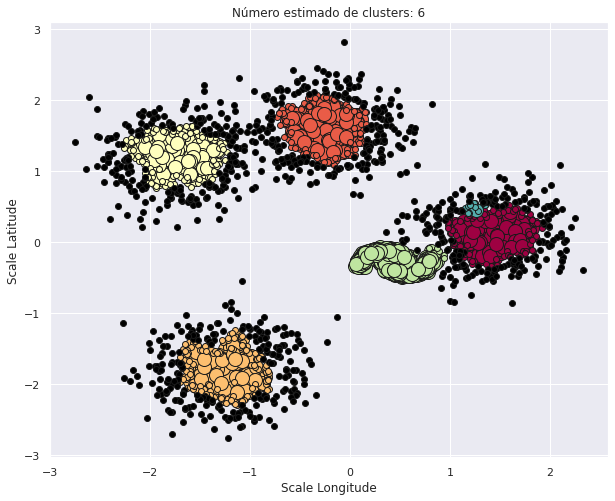

In [ ]:
import numpy as np
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
plt.figure(figsize=(10,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')

from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))
plt.show() 

# How to find the optimal value of K in KNN?